In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
from sklearn import set_config
set_config(display = 'diagram')

# Sklearn preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, mutual_info_regression, VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

1. EDA

In [ ]:
# for brands: target encoder from scikit learn

In [127]:
df = pd.read_csv('raw_data/vestiaire.csv')
df.head(30)

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0
5,43246347,Mid-length dress,Mid,"See By Chloe white dress, size 42 IT (size lik...",See by Chloé Cotton - elasthane Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,3062607,julie3062607,1-2 days,France,3.0,22.0,493200.0,21.0,100.0
6,43246327,Silk trousers,Silk trousers Just Cavalli Black size 40 IT in...,Amazing flamingo three quarters trousers 100 s...,Just Cavalli Silk Trousers,Women,Women Clothing,All seasons,Never worn,1.0,...,Tourcoing,26079249,trulavina26079249,NaN,Belgium,0.0,8.0,0.0,5.0,0.0
7,43246317,Silk mid-length dress,Silk mid,Plaid sleeveless below knee silk dress. Worn ...,J.Crew Silk Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,19210149,catriona19210149,6-7 days,Ireland,40.0,41.0,0.0,43.0,82.0
8,43246287,Suit jacket,Suit jacket Aquascutum Beige size 46 IT in Cot...,Aquascutum classic cut short sleeve jacket and...,Aquascutum Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,14857400,navi2018,1-2 days,Italy,26.0,49.0,283504.0,34.0,96.0
9,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Tweed suit with lace edges. In perfect conditi...,Dior Wool Jackets,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,2709130,simo2709130,1-2 days,Italy,172.0,6.0,4692.0,375.0,95.0


In [6]:
df.describe()

,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,9.005140e+05,900514.000000,900514.000000,900514.000000,900514.000000,900514.000000,886778.000000,9.005140e+05,900514.000000,900514.000000,9.005140e+05,9.005140e+05,900514.000000
mean,3.810003e+07,6.298326,2437.277576,386.862536,331.639409,290.436463,55.486152,1.382227e+07,664.958267,1497.663143,5.623160e+04,9.904618e+03,72.461753
std,7.749403e+06,12.920079,3702.869580,1859.559156,1591.472807,1498.157606,290.259974,7.535593e+06,3552.744596,5460.166852,1.438156e+05,3.557486e+05,34.428663
min,1.113630e+05,0.000000,2.000000,6.130000,5.110000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-180.000000
25%,3.811580e+07,1.000000,66.000000,83.070000,71.360000,58.580000,11.720000,7.977389e+06,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,4.174207e+07,3.000000,341.000000,168.700000,143.780000,125.370000,23.970000,1.438324e+07,34.000000,52.000000,0.000000e+00,7.300000e+01,88.000000
75%,4.267775e+07,7.000000,3266.000000,350.000000,298.200000,261.900000,50.480000,1.946235e+07,178.000000,373.000000,2.539300e+04,2.900000e+02,95.000000
max,4.324884e+07,3154.000000,18237.000000,632610.000000,527175.000000,509229.750000,105435.000000,2.608177e+07,79738.000000,39628.000000,1.064736e+06,1.417912e+07,100.000000


In [8]:
df.isnull().sum()


product_id                         0
product_type                       0
product_name                       0
product_description                7
product_keywords                1183
product_gender_target              0
product_category                1183
product_season                     2
product_condition                  0
product_like_count                 0
sold                               0
reserved                           0
available                          0
in_stock                           0
should_be_gone                     0
brand_id                           0
brand_name                         0
brand_url                          0
product_material                   4
product_color                      1
price_usd                          0
seller_price                       0
seller_earning                     0
seller_badge                       0
has_cross_border_fees          13736
buyers_fees                    13736
warehouse_name                     0
s

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [10]:
df.dtypes


product_id                      int64
product_type                   object
product_name                   object
product_description            object
product_keywords               object
product_gender_target          object
product_category               object
product_season                 object
product_condition              object
product_like_count            float64
sold                             bool
reserved                         bool
available                        bool
in_stock                         bool
should_be_gone                   bool
brand_id                        int64
brand_name                     object
brand_url                      object
product_material               object
product_color                  object
price_usd                     float64
seller_price                  float64
seller_earning                float64
seller_badge                   object
has_cross_border_fees          object
buyers_fees                   float64
warehouse_na

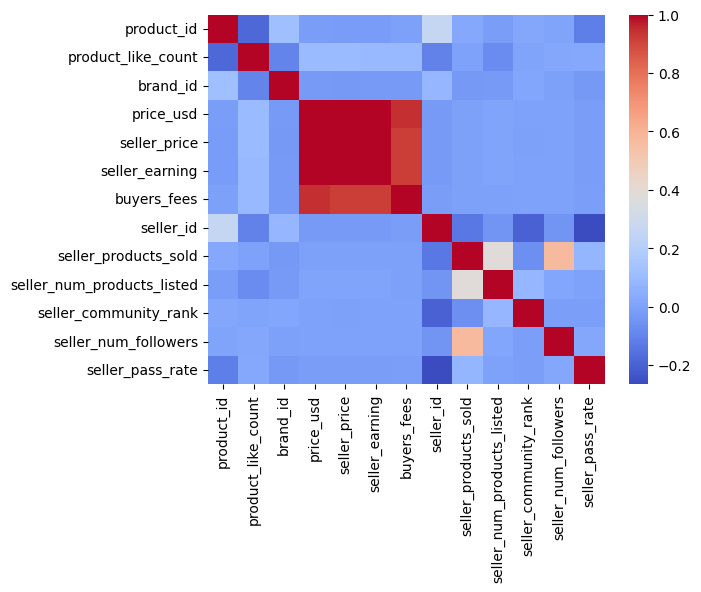

In [18]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm')
plt.show()


<Axes: >

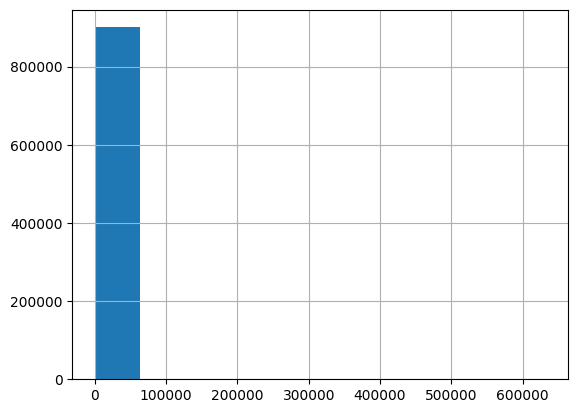

In [15]:
df['price_usd'].hist()

<Axes: >

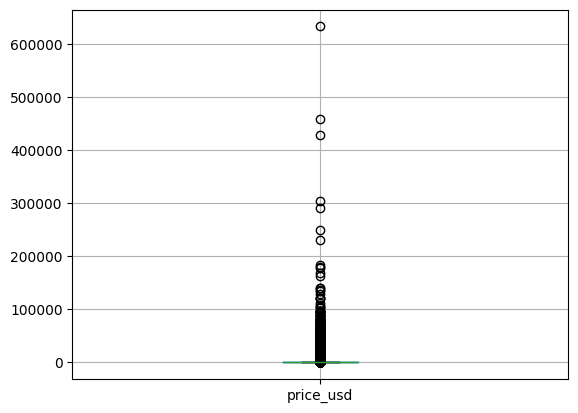

In [16]:
df.boxplot(column='price_usd')


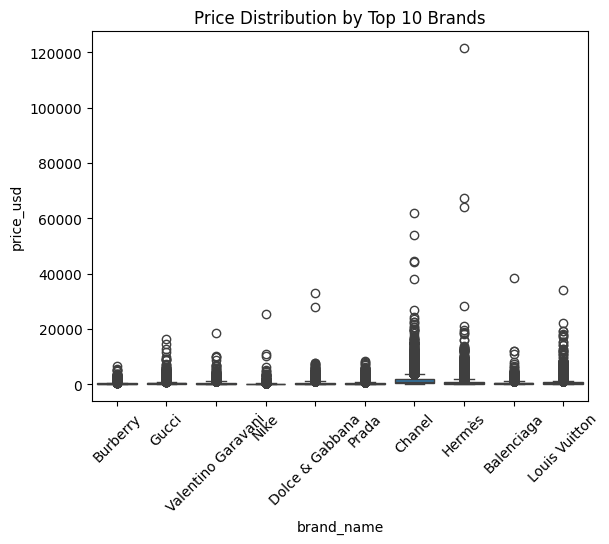

In [22]:
# Boxplot for Brands (only top brands to avoid clutter)
top_brands = df['brand_name'].value_counts().index[:10]  # Select top 10 brands by frequency
sns.boxplot(x='brand_name', y='price_usd', data=df[df['brand_name'].isin(top_brands)])
plt.xticks(rotation=45)
plt.title('Price Distribution by Top 10 Brands')
plt.show()


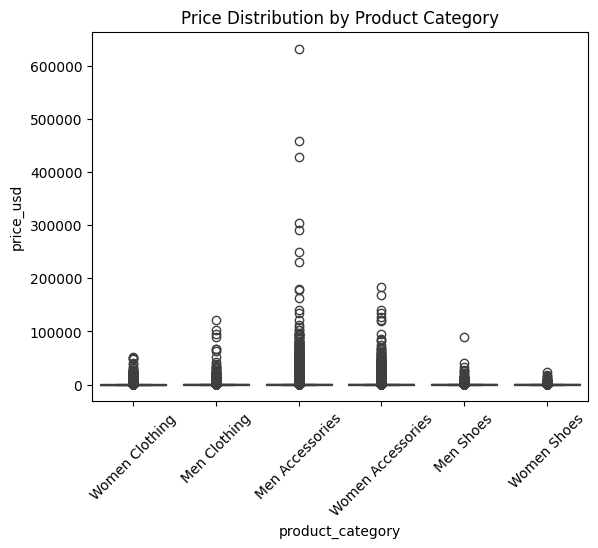

In [23]:
sns.boxplot(x='product_category', y='price_usd', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Product Category')
plt.show()

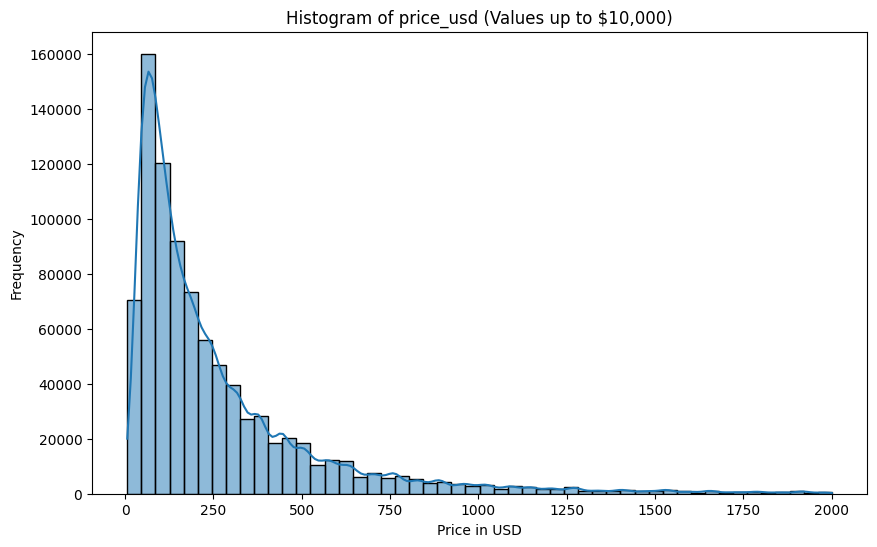

In [8]:
df_filtered = df[df['price_usd'] <= 2000]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['price_usd'], bins=50, kde=True)
plt.title('Histogram of price_usd (Values up to $10,000)')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

In [12]:
df_capped = df[df['price_usd'] <= 10000]

# Display the first few rows of the new dataframe to confirm
df_capped.shape

(898367, 36)

In [11]:
df.shape

(900514, 36)

In [13]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

product_description           7
product_keywords           1183
product_category           1183
product_season                2
product_material              4
product_color                 1
has_cross_border_fees     13736
buyers_fees               13736
seller_username              39
usually_ships_within     154791
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="mean") 

# Call the "fit" method on the object
imputer.fit(data[['Pesos']]) 

# Call the "transform" method on the object
data['Pesos'] = imputer.transform(data[['Pesos']]) 

# The mean is stored in the transformer's memory
imputer.statistics_ 

In [16]:
import numpy as np

df['usually_ships_within'] = df['usually_ships_within'].replace(np.nan, "1-2 days") # Replace NaN by most common value
df['usually_ships_within'].value_counts()

usually_ships_within
1-2 days            701734
3-5 days            180755
6-7 days             16816
More than 7 days      1209
Name: count, dtype: int64

In [19]:
df['has_cross_border_fees'].value_counts()

has_cross_border_fees
True    886778
Name: count, dtype: int64

In [20]:
df['has_cross_border_fees'] = df['has_cross_border_fees'].replace(np.nan, False) # Replace NaN by most common value
df['has_cross_border_fees'].value_counts()


/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_52227/3563962384.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_cross_border_fees'] = df['has_cross_border_fees'].replace(np.nan, False) # Replace NaN by most common value


has_cross_border_fees
True     886778
False     13736
Name: count, dtype: int64

In [21]:
df['buyers_fees'] = df['buyers_fees'].replace(np.nan, 0) # Replace NaN by most common value
df['buyers_fees']


0           0.00
1          21.30
2         213.00
3          14.90
4          19.95
           ...  
900509     14.91
900510     25.56
900511     31.95
900512      9.59
900513    159.75
Name: buyers_fees, Length: 900514, dtype: float64

In [22]:
df[['has_cross_border_fees', 'buyers_fees']]

,has_cross_border_fees,buyers_fees
0,False,0.00
1,True,21.30
2,True,213.00
3,True,14.90
4,True,19.95
...,...,...
900509,True,14.91
900510,True,25.56
900511,True,31.95
900512,True,9.59


In [24]:
#remove remaining null values, drop rows
df = df.dropna()


In [25]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [31]:
df.head(2)

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.0


In [47]:
brand_avg_price = df.groupby('brand_name')['price_usd'].mean()

# Sort the brands by average price in descending order
top_brands = brand_avg_price.sort_values(ascending=False).head(20)
top_brands

brand_name
Richard Mille             83408.116667
A. Lange & Sohne          50014.530000
Patek Philippe            34832.169735
Graff                     34727.760000
Audemars Piguet           22151.781268
Jason of Beverly Hills    20350.000000
Roger Dubuis              19845.143636
Nello Santi               17957.850000
Harry Winston             17534.209630
Ossie Clark               16500.000000
De Grisogono              15943.284286
Glashütte Original        15202.357143
Daniel Roth               15195.420000
Breguet                   14391.155091
Rolex                     13919.776675
Mellerio                  12422.160000
Blancpain                 11991.234773
Adfunture Workshop        11502.000000
Vacheron Constantin       11313.007692
Van Cleef & Arpels        11041.216716
Name: price_usd, dtype: float64

In [45]:
df['brand_name'].value_counts().head(40)

brand_name
Gucci                  41008
Burberry               24018
Dolce & Gabbana        22024
Prada                  20972
Hermès                 18711
Louis Vuitton          18673
Chanel                 15006
Nike                   13621
Valentino Garavani     10641
Balenciaga             10571
Dior                   10492
Fendi                  10460
Adidas                 10030
Saint Laurent           9887
Versace                 9786
Polo Ralph Lauren       9097
Christian Louboutin     7852
Bottega Veneta          6871
Yves Saint Laurent      6757
Dsquared2               6383
Givenchy                6336
Salvatore Ferragamo     5940
Tod's                   5826
Max Mara                5808
Celine                  5787
Alexander McQueen       5534
Jimmy Choo              5051
Dior Homme              4898
Moncler                 4881
Miu Miu                 4413
Moschino                4289
Michael Kors            4285
D&G                     4262
Sandro                  4261
Bos

In [50]:
material_mapping = {
    'Wool': 'Natural Fibers',
    'Cotton': 'Natural Fibers',
    'Silk': 'Natural Fibers',
    'Linen': 'Natural Fibers',
    'Cashmere': 'Natural Fibers',
    'Polyester': 'Synthetic Fibers',
    'Polyamide': 'Synthetic Fibers',
    'Synthetic': 'Synthetic Fibers',
    'Lycra': 'Synthetic Fibers',
    'Spandex': 'Synthetic Fibers',
    'Leather': 'Animal-Based Materials',
    'Suede': 'Animal-Based Materials',
    'Fur': 'Animal-Based Materials',
    'Rabbit': 'Animal-Based Materials',
    'Mink': 'Animal-Based Materials',
    'Fox': 'Animal-Based Materials',
    'Python': 'Animal-Based Materials',
    'Shearling': 'Animal-Based Materials',
    'Alligator': 'Animal-Based Materials',
    'Crocodile': 'Animal-Based Materials',
    'Chinchilla': 'Animal-Based Materials',
    'Pony-style calfskin': 'Animal-Based Materials',
    'Water snake': 'Animal-Based Materials',
    'Eel': 'Animal-Based Materials',
    'Gold': 'Metals',
    'Platinum': 'Metals',
    'Titanium': 'Metals',
    'Silver': 'Metals',
    'Steel': 'Metals',
    'Gold plated': 'Metals',
    'White gold': 'Metals',
    'Yellow gold': 'Metals',
    'Silver Plated': 'Metals',
    'Silver Gilt': 'Metals',
    'Cotton - elasthane': 'Blends',
    'Denim - Jeans': 'Blends',
    'Wicker': 'Blends',
    'Vegan leather': 'Other Materials',
    'Velvet': 'Other Materials',
    'Lace': 'Other Materials',
    'Glitter': 'Other Materials',
    'Tweed': 'Other Materials',
    'Vinyl': 'Other Materials',
    'Exotic leathers': 'Other Materials',
    'Plastic': 'Other Materials',
    'Patent leather': 'Other Materials',
    'Astrakhan': 'Other Materials',
    'Ostrich': 'Other Materials',
    'Sponge': 'Other Materials',
    'Rubber': 'Other Materials',
    'Wood': 'Other Materials',
    'Ceramic': 'Other Materials',
    'Glass': 'Other Materials',
    'Pearl': 'Other Materials',
    'Chain': 'Metals',
    'Pearls': 'Other Materials',
    'Varan': 'Other Materials',
    'Not specified': 'Unspecified'
}
df['material_group'] = df['product_material'].map(material_mapping)
df.head(1)

/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_52227/486646511.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['material_group'] = df['product_material'].map(material_mapping)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,material_group
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,25775970,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.0,Natural Fibers


In [66]:
shipping_days_mapping = {
    '1-2 days': 1.5,
    '3-5 days': 4,
    '6-7 days': 6.5,
    'More than 7 days': 8  # or another appropriate value based on your data
}
df['shipping_days'] = df['usually_ships_within'].map(shipping_days_mapping)


/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_52227/3017726683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shipping_days'] = df['usually_ships_within'].map(shipping_days_mapping)


In [65]:
df['usually_ships_within'].unique()

array(['1-2 days', '3-5 days', '6-7 days', 'More than 7 days'],
      dtype=object)

In [56]:
color_mapping = {
    'Grey': 'Neutrals',
    'Navy': 'Neutrals',
    'White': 'Neutrals',
    'Black': 'Neutrals',
    'Beige': 'Neutrals',
    'Ecru': 'Neutrals',
    'Anthracite': 'Neutrals',
    'Charcoal': 'Neutrals',
    'Khaki': 'Neutrals',
    'Camel': 'Neutrals',
    'camel': 'Neutrals',
    'Brown': 'Neutrals',
    'White / Black': 'Neutrals',
    'Beige / Grey': 'Neutrals',
    'brown/black': 'Neutrals',

    'Red': 'Colorful',
    'Green': 'Colorful',
    'Blue': 'Colorful',
    'Turquoise': 'Colorful',
    'Yellow': 'Colorful',
    'Pink': 'Colorful',
    'Orange': 'Colorful',
    'Burgundy': 'Colorful',
    'Purple': 'Colorful',
    'Bordeaux': 'Colorful',

    'Metallic': 'Special',
    'Gold': 'Special',
    'Silver': 'Special',
    'silver/black': 'Special',
    'Multicolour': 'Special'
}

In [57]:
df['color_group'] = df['product_color'].map(color_mapping)
df.head(2)

/var/folders/51/br93cpt16z799l0l6d9pln2h0000gn/T/ipykernel_52227/1649280891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color_group'] = df['product_color'].map(color_mapping)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,material_group,color_group
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.0,Natural Fibers,Neutrals
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,olivia13698770,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.0,Natural Fibers,Neutrals


In [86]:
df['gender_binary'] = df['product_gender_target'].map({'Men': 0, 'Women': 1})
df.head(1)
df.shape

(899278, 41)

In [88]:
df_dropped = df.drop(['product_gender_target', 'product_gender_binary','product_id', 'product_type', 'brand_url', 'brand_id', 'brand_name', 
                      'product_material', 'product_color', 'product_name', 
                      'product_description', 'product_keywords', 'warehouse_name', 'seller_id',
                      'seller_pass_rate', 'seller_num_followers', 'seller_country', 'seller_price', 
                      'seller_earning', 'seller_community_rank', 'seller_username', 
                      'seller_num_products_listed', 'sold', 'reserved', 'available', 
                      'in_stock', 'should_be_gone', 'has_cross_border_fees', 'usually_ships_within'], axis=1)
df_dropped.head()

,product_category,product_season,product_condition,product_like_count,price_usd,seller_badge,buyers_fees,seller_products_sold,material_group,color_group,shipping_days,gender_binary
0,Women Clothing,Autumn / Winter,Never worn,34.0,272.92,Common,0.00,3.0,Natural Fibers,Neutrals,1.5,1
1,Women Clothing,All seasons,Very good condition,1.0,127.80,Common,21.30,0.0,Natural Fibers,Neutrals,1.5,1
2,Women Clothing,Autumn / Winter,Very good condition,2.0,1278.00,Expert,213.00,58.0,Natural Fibers,Neutrals,1.5,1
3,Women Clothing,All seasons,Very good condition,0.0,163.90,Expert,14.90,63.0,Synthetic Fibers,Neutrals,1.5,1
4,Women Clothing,All seasons,Very good condition,1.0,119.72,Common,19.95,19.0,Other Materials,Neutrals,4.0,1


In [98]:
df2 = df_dropped[df_dropped['price_usd'] <= 10000]
df2.shape

(897131, 12)

2. Preprocessing

In [114]:
y = df2['price_usd']
X = df2.drop(columns=['price_usd'])

X



,product_category,product_season,product_condition,product_like_count,seller_badge,buyers_fees,seller_products_sold,material_group,color_group,shipping_days,gender_binary
0,Women Clothing,Autumn / Winter,Never worn,34.0,Common,0.00,3.0,Natural Fibers,Neutrals,1.5,1
1,Women Clothing,All seasons,Very good condition,1.0,Common,21.30,0.0,Natural Fibers,Neutrals,1.5,1
2,Women Clothing,Autumn / Winter,Very good condition,2.0,Expert,213.00,58.0,Natural Fibers,Neutrals,1.5,1
3,Women Clothing,All seasons,Very good condition,0.0,Expert,14.90,63.0,Synthetic Fibers,Neutrals,1.5,1
4,Women Clothing,All seasons,Very good condition,1.0,Common,19.95,19.0,Other Materials,Neutrals,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...
900509,Women Shoes,All seasons,Good condition,1.0,Expert,14.91,40.0,Other Materials,Special,1.5,1
900510,Women Shoes,All seasons,Good condition,1.0,Expert,25.56,26.0,Animal-Based Materials,Neutrals,1.5,1
900511,Women Shoes,All seasons,Very good condition,0.0,Common,31.95,0.0,Animal-Based Materials,Neutrals,1.5,1
900512,Women Shoes,All seasons,Very good condition,27.0,Trusted,9.59,2.0,Animal-Based Materials,Neutrals,1.5,1


In [115]:
X.dtypes

product_category         object
product_season           object
product_condition        object
product_like_count      float64
seller_badge             object
buyers_fees             float64
seller_products_sold    float64
material_group           object
color_group              object
shipping_days           float64
gender_binary             int64
dtype: object

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
df['seller_badge'].unique()

array(['Common', 'Expert', 'Trusted'], dtype=object)

<Axes: xlabel='product_like_count', ylabel='Count'>

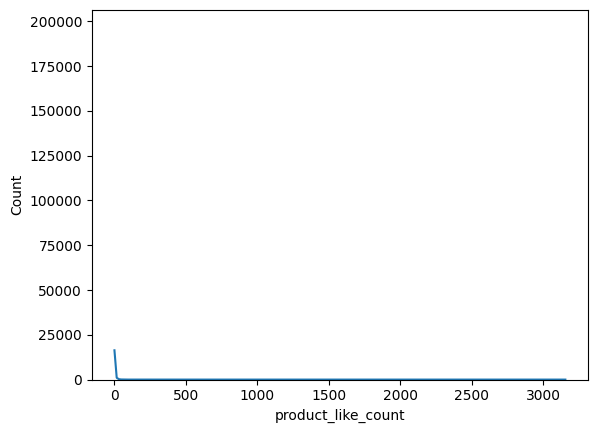

In [75]:
sns.histplot(df2['product_like_count'],kde = True)


<Axes: xlabel='buyers_fees', ylabel='Count'>

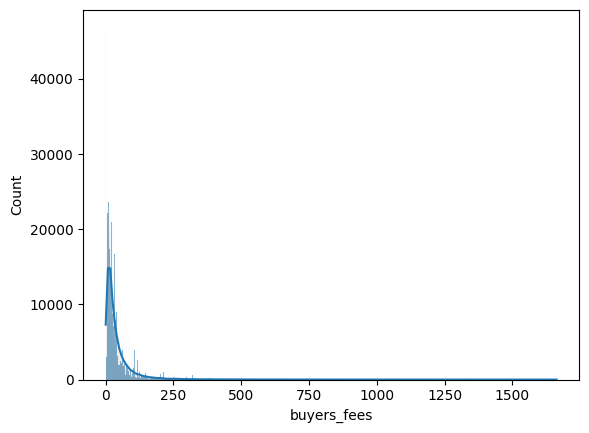

In [76]:
sns.histplot(df2['buyers_fees'],kde = True)


In [104]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder


In [102]:
X

,product_category,product_season,product_condition,product_like_count,seller_badge,buyers_fees,seller_products_sold,material_group,color_group,shipping_days,gender_binary
0,Women Clothing,Autumn / Winter,Never worn,34.0,Common,0.00,3.0,Natural Fibers,Neutrals,1.5,1
1,Women Clothing,All seasons,Very good condition,1.0,Common,21.30,0.0,Natural Fibers,Neutrals,1.5,1
2,Women Clothing,Autumn / Winter,Very good condition,2.0,Expert,213.00,58.0,Natural Fibers,Neutrals,1.5,1
3,Women Clothing,All seasons,Very good condition,0.0,Expert,14.90,63.0,Synthetic Fibers,Neutrals,1.5,1
4,Women Clothing,All seasons,Very good condition,1.0,Common,19.95,19.0,Other Materials,Neutrals,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...
900509,Women Shoes,All seasons,Good condition,1.0,Expert,14.91,40.0,Other Materials,Special,1.5,1
900510,Women Shoes,All seasons,Good condition,1.0,Expert,25.56,26.0,Animal-Based Materials,Neutrals,1.5,1
900511,Women Shoes,All seasons,Very good condition,0.0,Common,31.95,0.0,Animal-Based Materials,Neutrals,1.5,1
900512,Women Shoes,All seasons,Very good condition,27.0,Trusted,9.59,2.0,Animal-Based Materials,Neutrals,1.5,1


In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder

In [ ]:
TargetEncoder(categories='auto', target_type='auto', smooth='auto', cv=5, shuffle=True, random_state=None)[source]


In [107]:
# Define the transformers for numerical and categorical features
num_transformer = make_pipeline(RobustScaler())

# Categorical feature transformers
cat_transformer = make_pipeline(OneHotEncoder(sparse_output=False, handle_unknown='ignore'))

# Ordinal feature transformers
ord_enc_product_condition = OrdinalEncoder(categories=[['Fair condition', 'Good condition', 'Very good condition', 'Never worn', 'Never worn, with tag']])
ord_enc_seller_badge = OrdinalEncoder(categories=[['Common', 'Trusted', 'Expert']])

# Create a preprocessor pipeline
preproc_baseline = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['product_like_count', 'buyers_fees', 'seller_products_sold', 'shipping_days']),
        ('cat', cat_transformer, ['product_category', 'product_season', 'material_group', 'color_group']),
        ('ord_condition', ord_enc_product_condition, ['product_condition']),
        ('ord_badge', ord_enc_seller_badge, ['seller_badge'])
    ],
    remainder='passthrough'  # Drop any other columns not specified in transformers
)

preproc_baseline


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['product_like_count', 'buyers_fees',
                                  'seller_products_sold', 'shipping_days']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['product_category', 'product_season',
                                  'material_group', 'color_group']),
                                ('ord_condition',
                                 OrdinalEncoder(categories=[['Fair condition',
                                                             'Good condition',
                                                             'Very good '
                                                             'condition',
                                                             'Never worn',
                                                             'Never worn, with '
                                                             'tag']]),
                                 ['product_condition']),
                                ('ord_badge',
                                 OrdinalEncoder(categories=[['Common',
                                                             'Trusted',
                                                             'Expert']]),
                                 ['seller_badge'])])

In [119]:
# Fit and transform the data
X_train_transformed = preproc_baseline.fit_transform(X_train)
X_train_transformed.shape

(627991, 27)

In [120]:
pd.DataFrame(
    X_train_transformed,
    columns=preproc_baseline.get_feature_names_out()
).head()

,num__product_like_count,num__buyers_fees,num__seller_products_sold,num__shipping_days,cat__product_category_Men Accessories,cat__product_category_Men Clothing,cat__product_category_Men Shoes,cat__product_category_Women Accessories,cat__product_category_Women Clothing,cat__product_category_Women Shoes,...,cat__material_group_Other Materials,cat__material_group_Synthetic Fibers,cat__material_group_Unspecified,cat__material_group_nan,cat__color_group_Colorful,cat__color_group_Neutrals,cat__color_group_Special,ord_condition__product_condition,ord_badge__seller_badge,remainder__gender_binary
0,1.333333,-0.387978,4.151163,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
1,0.666667,0.201665,-0.174419,5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
2,0.666667,0.332553,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
3,-0.500000,0.554254,0.313953,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
4,-0.166667,-0.450950,-0.063953,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0


3. model

In [111]:
from sklearn.linear_model import LinearRegression

# Instantiate the model (💡 in Sklearn often called "estimator")
model = LinearRegression()

In [112]:
pipe_baseline = make_pipeline(preproc_baseline, model)
pipe_baseline

/Users/apollinelabey/.pyenv/versions/3.10.6/envs/2nd_hand_fashion_valuation/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  ['product_like_count',
                                                   'buyers_fees',
                                                   'seller_products_sold',
                                                   'shipping_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['product_category',
                                                   '...uct_season',
                                                   'material_group',
                                                   'color_group']),
                                                 ('ord_condition',
                                                  OrdinalEncoder(categories=[['Fair '
                                                                              'condition',
                                                                              'Good '
                                                                              'condition',
                                                                              'Very '
                                                                              'good '
                                                                              'condition',
                                                                              'Never '
                                                                              'worn',
                                                                              'Never '
                                                                              'worn, '
                                                                              'with '
                                                                              'tag']]),
                                                  ['product_condition']),
                                                 ('ord_badge',
                                                  OrdinalEncoder(categories=[['Common',
                                                                              'Trusted',
                                                                              'Expert']]),
                                                  ['seller_badge'])])),
                ('linearregression', LinearRegression())])

In [121]:
X_test

,product_category,product_season,product_condition,product_like_count,seller_badge,buyers_fees,seller_products_sold,material_group,color_group,shipping_days,gender_binary
542380,Women Accessories,Autumn / Winter,Very good condition,48.0,Common,13.22,46.0,Natural Fibers,Neutrals,1.5,1
517219,Women Accessories,Autumn / Winter,Good condition,3.0,Common,15.98,5002.0,Natural Fibers,Neutrals,1.5,1
503462,Women Accessories,All seasons,Never worn,8.0,Common,74.55,1.0,NaN,Neutrals,1.5,1
686157,Men Shoes,All seasons,Good condition,2.0,Trusted,81.79,45.0,Animal-Based Materials,Neutrals,1.5,0
522794,Women Accessories,All seasons,Good condition,1.0,Common,202.35,164.0,Animal-Based Materials,Neutrals,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...
248574,Men Clothing,All seasons,Very good condition,17.0,Common,21.30,18.0,Natural Fibers,Neutrals,1.5,0
684603,Men Shoes,All seasons,Never worn,3.0,Common,66.03,34.0,NaN,Neutrals,4.0,0
119478,Women Clothing,All seasons,Never worn,0.0,Expert,8.50,11.0,Natural Fibers,Colorful,1.5,1
331769,Men Clothing,All seasons,Very good condition,7.0,Common,25.00,22.0,Natural Fibers,Neutrals,1.5,0


In [122]:
# Train Pipeline
pipe_baseline.fit(X_train,y_train)

# Make predictions
#pipe_baseline.predict(X_test.iloc[0:1])

# Score model
pipe_baseline.score(X_test,y_test)

0.8284729600049736

In [126]:
from sklearn.model_selection import cross_val_score

# Cross-validate Pipeline
baseline_score = cross_val_score(pipe_baseline, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
baseline_score

np.float64(-76.35269880507195)

In [ ]:
# feature permutation day 2 ML

# next steps
#save preprocessor in a pickle file
# train model separately